# **SEMANTIC SEMANTATION**

Initial commanda for segmentation

In [0]:
import numpy as np
import time
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input,Lambda,Conv2D,Dropout,MaxPooling2D,Conv2DTranspose,concatenate
from tqdm import tqdm


**Code to unZip the Dataset file**

In [0]:
from zipfile import ZipFile
file_name = "cityscapes-image-pairs.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


**Download the images from dataset**

In [0]:
train_folder="cityscapes_data/train/"

valid_folder="cityscapes_data/val/"

def get_images_masks(path):
    names=os.listdir(path)
    img_g,img_m=[],[]
    for name in names:
        img=cv2.imread(path+name)
        img=cv2.normalize(img,None,0,1,cv2.NORM_MINMAX,cv2.CV_32F)
        img=img[:,:,::-1]
        img_g.append(img[:,:256])
        img_m.append(img[:,256:])
        del img
    del names
    return img_g,img_m
        
train_imgs,train_masks=get_images_masks(train_folder)
valid_imgs,valid_masks=get_images_masks(valid_folder)

#train_len=len(train_imgs)
#valid_len=len(valid_imgs)
#print(f'Train Images:{train_len}\nValid Im

**Prepare the data for the training by separating X and Y vectors.**

**but we are not using this code **

**its not sutable to our program** 

In [0]:
'''# Prepare the data for the training by separating X and Y vectors.
X_train_imgs = np.zeros((500,256,256,3));
Y_train_masks = np.zeros((500,256,256,3));
for i in tqdm(range(0,500)):
  img = train_imgs[i];
  mask = train_masks[i];
  X_train_imgs[i] = img ;
  Y_train_masks[i] = mask ;

X_test_imgs = np.zeros((500,256,256,3));
Y_test_masks = np.zeros((500,256,256,3));
for i in tqdm(range(0,500)):
  img = valid_imgs[i];
  mask = valid_masks[i];
  X_test_imgs[i] = img ;
  Y_test_masks[i] = mask ;'''

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:10<00:00,  7.11it/s]


# **MODEL FOR SEMANTIC SEGMANTATION**

In [0]:
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3
 

#Build the model
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = Dropout(0.1)(c1)
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = MaxPooling2D((2, 2))(c1)

c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = Dropout(0.1)(c2)
c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = MaxPooling2D((2, 2))(c2)
 
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = Dropout(0.2)(c3)
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = MaxPooling2D((2, 2))(c3)
 
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = Dropout(0.2)(c4)
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = Dropout(0.3)(c5)
c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = Dropout(0.2)(c6)
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = Dropout(0.2)(c7)
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = Dropout(0.1)(c8)
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = Dropout(0.1)(c9)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = Conv2D(3, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss="binary_crossentropy" , metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

# **ImageDataGenerator**

**WE ARE NOT USING THIS COMMAND IN OUR DATASET BECAUSE WE HAVE A BIG DATASET, SO WE DONT NEED ImageDataGenerator**

In [0]:
'''Genrator_args = dict(featurewise_center=True, featurewise_std_normalization=True,rotation_range=20,
width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2)
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**Genrator_args)
mask_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**Genrator_args)
val_image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**Genrator_args)
val_mask_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**Genrator_args)
image_datagen.fit(np.array(train_imgs,dtype='float16'), augment=True, seed=1)
mask_datagen.fit(np.array(train_masks,dtype='float16'), augment=True, seed=1)
val_image_datagen.fit(np.array(train_imgs,dtype='float16'), augment=True, seed=2)
val_mask_datagen.fit(np.array(train_masks,dtype='float16'), augment=True, seed=2)'''

In [0]:
callbacks = [tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss')]

In [0]:
results = model.fit(np.array(train_imgs,dtype='float32'),np.array(train_masks,dtype='float32'),
                    validation_data=(np.array(valid_imgs,dtype='float32'),np.array(valid_masks,dtype='float32')),
                    epochs=10,steps_per_epoch=297,verbose=1,batch_size=10, callbacks=callbacks)

Train on 2975 samples, validate on 500 samples
Epoch 1/10
2965/2975 [============================>.] - ETA: 11s - loss: 0.5681 - accuracy: 0.0760 - val_loss: 0.5660 - val_accuracy: 0.0825

# **GRAPHS**

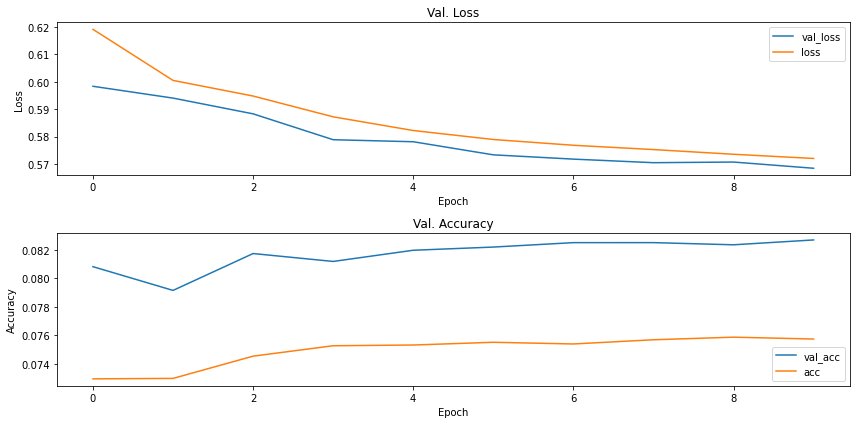

In [0]:
valloss = results.history["val_loss"]
valacc = results.history["val_accuracy"]
loss = results.history["loss"]
acc = results.history["accuracy"]

plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.title("Val. Loss")
plt.plot(valloss , label="val_loss")
plt.plot(loss , label="loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(212)
plt.title("Val. Accuracy")
plt.plot(valacc , label="val_acc")
plt.plot(acc , label="acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.savefig("graphs1.png", dpi=150)

plt.show()

# **PREDICTED IMAGES**

In [0]:
def plot_imgs(img,mask,pred):
    mask = np.reshape(mask,(256,256,3))
    pred = np.reshape(pred,(256,256,3))
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,10))
    ax1.imshow(img)
    ax1.axis('off')
    ax2.imshow(mask)
    ax2.axis('off')
    ax3.imshow(pred)
    ax3.axis('off')
    plt.tight_layout()
    #plt.savefig("learn.png", dpi=150)

    plt.show()

In [0]:
pred_masks = model.predict(np.array(valid_imgs,dtype='float16'))

-------------Input---------------------------------Actual mask------------------------Predicted mask-------


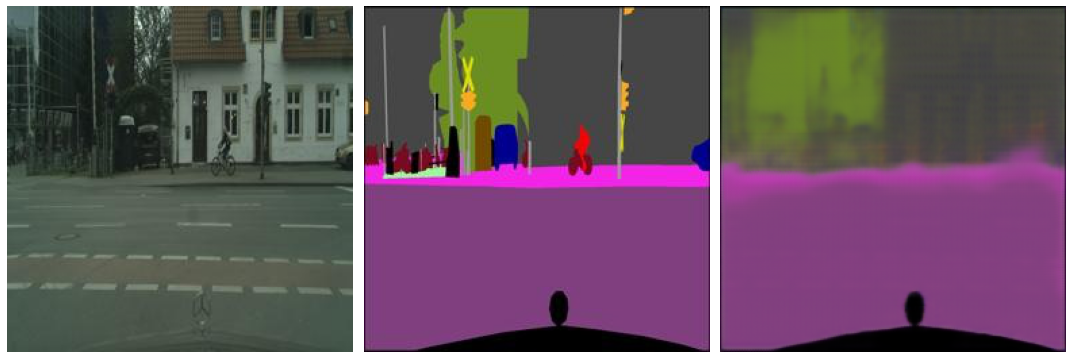

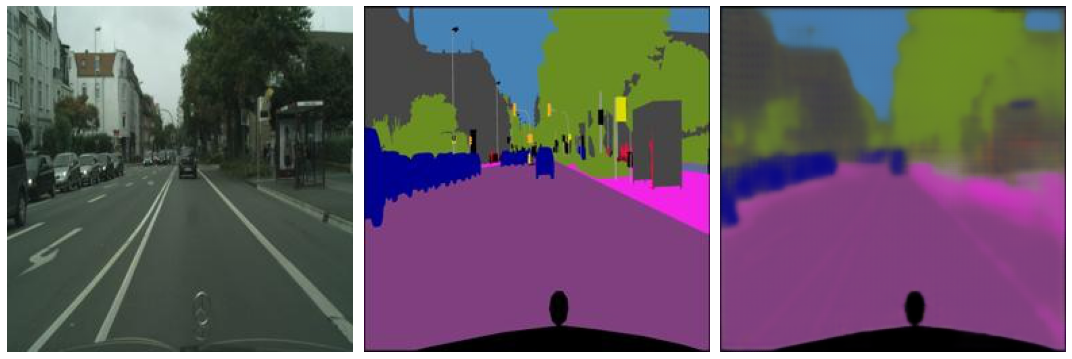

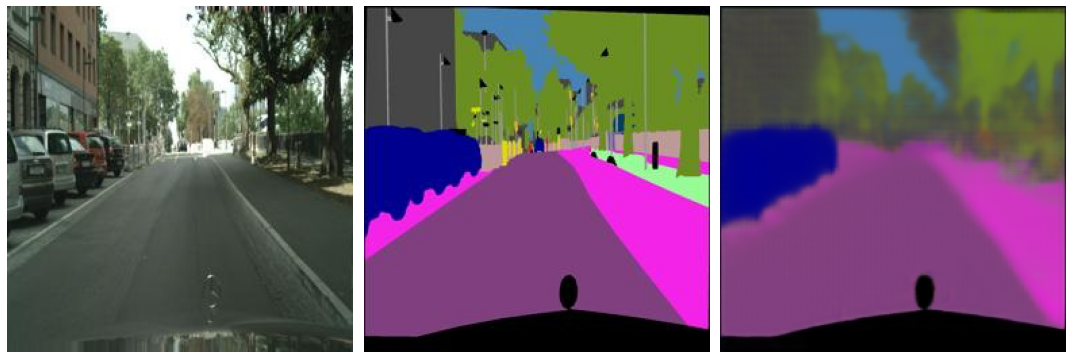

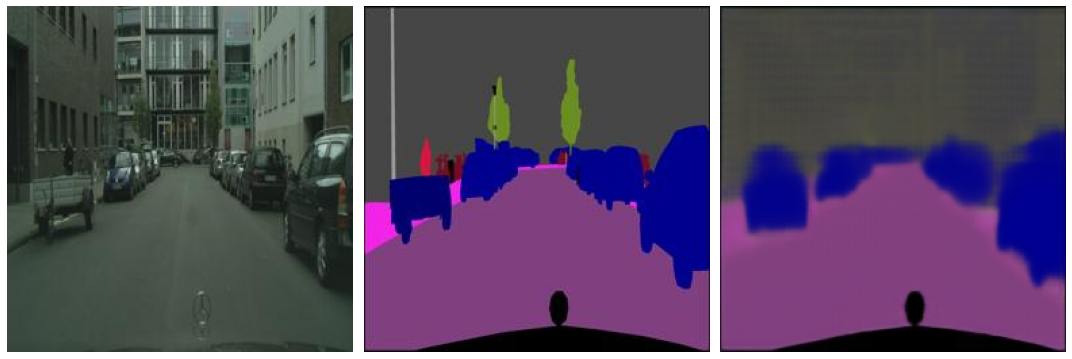

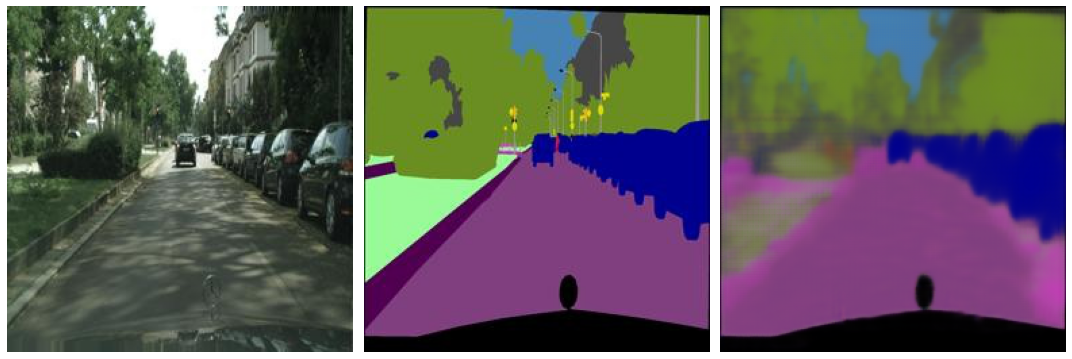

In [0]:
print('-------------Input---------------------------------Actual mask------------------------Predicted mask-------')
for i in range(5):
    x = np.random.randint(0,500,size=1)[0]
    plot_imgs(valid_imgs[x],valid_masks[x],pred_masks[x])